<a href="https://colab.research.google.com/github/Shaunak-Mukherjee/ECE-58000-Optimization-Methods-for-Systems-And-Control/blob/Optimization-Algorithms/Travelling_Salesman_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

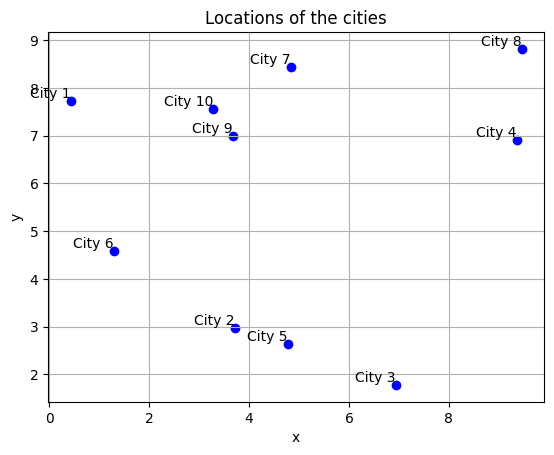

Number of different possible paths for visiting 10 cities once and only once: 362880
Best TSP City Route: [9 0 5 1 4 2 3 7 6 8]
Best fitness: 0.03674669556885764
Total distance: 27.213331281071362


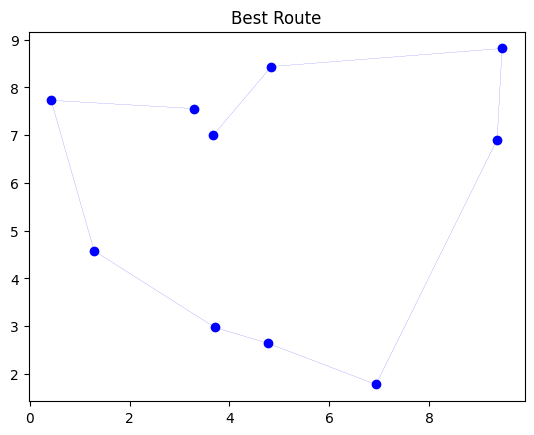

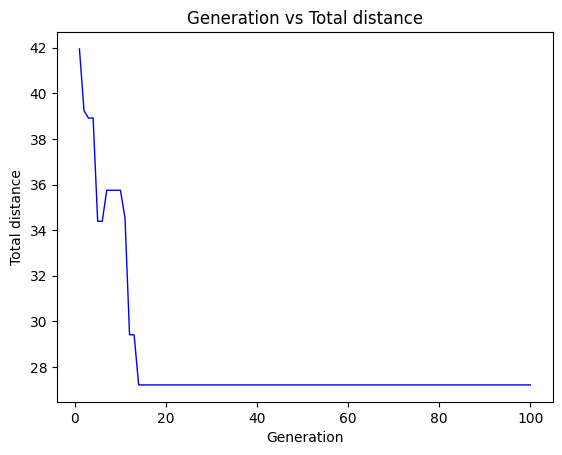

In [ ]:
# Genetic Algorithm Applied to Travelling Salesman Problem

# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from math import factorial, sqrt

# Locations of the cities (x, y coordinates)
x = [0.4306, 3.7094, 6.9330, 9.3582, 4.7758, 1.2910, 4.8383, 9.4560, 3.6774, 3.2849]
y = [7.7288, 2.9727, 1.7785, 6.9080, 2.6394, 4.5774, 8.4369, 8.8150, 7.0002, 7.5569]

num_cities = 10  # Total number of cities

# Labels for the cities
city_labels = ['City 1', 'City 2', 'City 3', 'City 4', 'City 5', 'City 6', 'City 7', 'City 8', 'City 9', 'City 10']

# Function to plot the locations of the cities
def plot_cities(x, y, city_labels):
    plt.figure()
    plt.scatter(x, y, color='blue')
    for i in range(len(x)):
        plt.text(x[i], y[i], city_labels[i], verticalalignment='bottom', horizontalalignment='right')
    plt.title('Locations of the cities')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Function to initialize the population with random permutations of city routes
def initialize_population(pop_size, num_cities):
    pop = np.zeros((pop_size, num_cities), dtype=int)
    for i in range(pop_size):
        pop[i, :] = np.random.permutation(num_cities)
    return pop

# Function to evaluate the fitness of a route
# Fitness is defined as the inverse of the total distance of the route
def evaluate_fitness(route, x, y):
    distance = 0
    num_cities = len(route)
    for i in range(num_cities - 1):
        distance += sqrt((x[route[i]] - x[route[i + 1]])**2 + (y[route[i]] - y[route[i + 1]])**2)
    distance += sqrt((x[route[-1]] - x[route[0]])**2 + (y[route[-1]] - y[route[0]])**2)
    fitness = 1 / distance
    return fitness

# Function to mutate a route
# Randomly swaps two cities in the route based on the mutation rate
def mutate(route, p_m_rate):
    num_cities = len(route)
    for i in range(num_cities):
        if random.random() < p_m_rate:
            j = random.randint(0, num_cities - 1)
            route[i], route[j] = route[j], route[i]
    return route

# Function to plot the best route found
def plot_route(x, y, route):
    plt.plot([x[i] for i in route], [y[i] for i in route], 'blue', linewidth=0.1)
    plt.scatter([x[i] for i in route], [y[i] for i in route], color='blue')
    plt.title('Best Route')
    plt.show()

# Function implementing the Genetic Algorithm
def genetic_algorithm(x, y, num_cities, pop_size, num_gens, p_m):
    pop = initialize_population(pop_size, num_cities)
    best_fit_per_gen = np.zeros(num_gens)

    for generation in range(num_gens):
        fitness = np.zeros(pop_size)
        for i in range(pop_size):
            fitness[i] = evaluate_fitness(pop[i, :], x, y)

        # Selection process: Select the top half of the population based on fitness
        sorted_indices = np.argsort(fitness)[::-1]
        selected_indices = sorted_indices[:pop_size // 2]
        parents = pop[selected_indices, :]

        # Crossover: Single-point crossover to create new offspring
        for i in range(0, pop_size, 2):
            parent1 = parents[i % (pop_size // 2), :]
            parent2 = parents[(i + 1) % (pop_size // 2), :]
            x_over = random.randint(1, num_cities - 1)

            offspring1 = np.concatenate((parent1[:x_over], [c for c in parent2 if c not in parent1[:x_over]]))
            offspring2 = np.concatenate((parent2[:x_over], [c for c in parent1 if c not in parent2[:x_over]]))
            pop[i, :] = mutate(offspring1, p_m)
            pop[i + 1, :] = mutate(offspring2, p_m)

        # Store the best fitness of this generation
        best_fit_per_gen[generation] = max(fitness)

    return pop, best_fit_per_gen

def main():
    # Plot the initial locations of the cities
    plot_cities(x, y, city_labels)

    # Calculate the number of possible paths to visit the cities
    possible_path = factorial(num_cities - 1)
    print(f'Number of different possible paths for visiting {num_cities} cities once and only once: {possible_path}')

    # Genetic Algorithm Parameters
    pop_size = 50  # Population size
    num_gens = 100  # Number of generations
    p_m = 0.01  # Rate of mutation

    # Run the Genetic Algorithm
    pop, best_fit_per_gen = genetic_algorithm(x, y, num_cities, pop_size, num_gens, p_m)

    # Report the best route and its fitness
    best_route = pop[0, :]
    total_distance = min(1. / best_fit_per_gen)
    best_fitness = evaluate_fitness(best_route, x, y)
    print(f'Best TSP City Route: {best_route}')
    print(f'Best fitness: {best_fitness}')
    print(f'Total distance: {total_distance}')

    # Plot the best route found by the algorithm
    plot_route(x, y, best_route)

    # Plot the progression of the total distance over generations
    plt.figure()
    plt.plot(range(1, num_gens + 1), 1. / best_fit_per_gen, 'blue', linewidth=1.0)
    plt.title('Generation vs Total distance')
    plt.xlabel('Generation')
    plt.ylabel('Total distance')
    plt.show()

if __name__ == '__main__':
    main()
